# Assignment 1

In this assignment, you will explore about word vectors.

- Submision: A report in ``PDF``, and your completed notebook file in ``ipynb``
    - The assignment will be evalulated mainly with report. So please include every detail you want to present in your report
    - Report: Free format. You can copy and paste part of your code for some problems.
    - ipynb: Save your notebook (with output of each cell if possible) as ipynb and submit it
- Evaluation criteria
    - How interesting and original are the presented examples
    - How well you describe the reason of success or failure of your examples by considering how Word2Vec is trained

## 0. Setup
- Check ``gensim`` library is installed
  - This assignment code was designed for ``gensim==4.1.2``
- List the downloadable vectors from ``gensim``


In [2]:
!pip install --upgrade gensim
import gensim
import numpy as np
import pprint as pp
print(gensim.__version__)

     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
4.1.2


In [3]:
import gensim.downloader
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

- Among the Word2Vec model codes above, select one model of your choice among ``glove-wiki-gigaword`` or ``glove-twitter``
    - numbers at the last represents the number of dimension of each Word2Vec Model
        - e.g. ``glove-twitter-25`` was trained on twitter dataset while embedding each word into 25-dim vector
        - e.g. ``glove-twitter-200`` was trained on twitter dataset while embedding each word into 200-dim vector
- Download the selected model and load it as a ``model``

In [4]:
your_model_code = 'glove-twitter-25' # select among the model code aboves
model = gensim.downloader.load(your_model_code) # download and load the model. It can take some time

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
# test the model output
model['cat']

array([-0.96419 , -0.60978 ,  0.67449 ,  0.35113 ,  0.41317 , -0.21241 ,
        1.3796  ,  0.12854 ,  0.31567 ,  0.66325 ,  0.3391  , -0.18934 ,
       -3.325   , -1.1491  , -0.4129  ,  0.2195  ,  0.8706  , -0.50616 ,
       -0.12781 , -0.066965,  0.065761,  0.43927 ,  0.1758  , -0.56058 ,
        0.13529 ], dtype=float32)

## Problem 1. Find Most Similar Words (10 pts)
- One of the most simple and typical use case of Word2Vec is finding a word based on similarity.
- You can list the most similar words for a given query word by using ``model.most_similar(your_word)``
    - Usually, every word in Word2Vec model is in lowercase
    
- **In your report**, present more than **5** interesting examples and explain why it was interesting for you**
    - Try to explain why those words are regarded similar in Word2Vec, considering how it was trained
   

In [ ]:
target_word = 'google' # Enter your word string here
# check the word is in the vocabulary of the model
assert model.has_index_for(target_word), f"The selected word, {target_word}, is not included in the model's vocabulary"
model.most_similar(target_word)

[('facebook', 0.9231431484222412),
 ('web', 0.9163658022880554),
 ('app', 0.905758261680603),
 ('youtube', 0.8911036252975464),
 ('microsoft', 0.8854138255119324),
 ('online', 0.883611261844635),
 ('yahoo', 0.8831738233566284),
 ('apple', 0.8823866248130798),
 ('internet', 0.8815463781356812),
 ('ios', 0.8784741759300232)]

In [ ]:
target_word = 'samsung' # Enter your word string here
# check the word is in the vocabulary of the model
assert model.has_index_for(target_word), f"The selected word, {target_word}, is not included in the model's vocabulary"
model.most_similar(target_word)

[('nokia', 0.9708800315856934),
 ('sony', 0.9545654654502869),
 ('galaxy', 0.9470023512840271),
 ('lumia', 0.935992956161499),
 ('nexus', 0.9343191385269165),
 ('smartphone', 0.9290376305580139),
 ('htc', 0.9199563264846802),
 ('android', 0.9002324938774109),
 ('motorola', 0.8977328538894653),
 ('blackberry', 0.8918020129203796)]

In [ ]:
target_word = 'soccer' # Enter your word string here
# check the word is in the vocabulary of the model
assert model.has_index_for(target_word), f"The selected word, {target_word}, is not included in the model's vocabulary"
model.most_similar(target_word)

[('basketball', 0.9710005521774292),
 ('baseball', 0.9686070084571838),
 ('football', 0.9614765644073486),
 ('softball', 0.9414636492729187),
 ('volleyball', 0.9386053085327148),
 ('wrestling', 0.9307113289833069),
 ('hockey', 0.9300045371055603),
 ('sports', 0.917955756187439),
 ('boxing', 0.9172205328941345),
 ('olympics', 0.9142605662345886)]

In [ ]:
target_word = 'seoul' # Enter your word string here
# check the word is in the vocabulary of the model
assert model.has_index_for(target_word), f"The selected word, {target_word}, is not included in the model's vocabulary"
model.most_similar(target_word)

[('taiwan', 0.9158143401145935),
 ('gayo', 0.9016762971878052),
 ('smtown', 0.8988726139068604),
 ('kbs', 0.8929415345191956),
 ('macau', 0.8912195563316345),
 ('fanmeeting', 0.8880347609519958),
 ('beijing', 0.8844577670097351),
 ('mnet', 0.882689356803894),
 ('daejun', 0.8788240551948547),
 ('shanghai', 0.8761192560195923)]

In [ ]:
target_word = 'chanel' # Enter your word string here
# check the word is in the vocabulary of the model
assert model.has_index_for(target_word), f"The selected word, {target_word}, is not included in the model's vocabulary"
model.most_similar(target_word)

[('prada', 0.8772910237312317),
 ('vintage', 0.8637654185295105),
 ('armani', 0.8589000701904297),
 ('pink', 0.8402380347251892),
 ('bling', 0.8394344449043274),
 ('bean', 0.8373516201972961),
 ('vuitton', 0.8363452553749084),
 ('hermes', 0.8340110778808594),
 ('melon', 0.8336739540100098),
 ('h&m', 0.8317590951919556)]

## Problem 2. Word Analogy (10 pts)
- Another interesting thing you can play with Word2Vec is word analogy
- Word analogy is done by adding and subtracting the word vector
- In the cell below, you can run an example like this
    - ``analogy(model, 'man', 'king', 'woman')`` represents a question of "man is to king as woman is to what?"
- Try with your own choice.
- **In your report**, present at least **5** interesting examples of your choice
    - You can include the failure case
    - Describe what did you expect and why the result was interesting for you

In [131]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(model, 'pencil', 'write', 'book')

[('read', 0.865265429019928),
 ('stories', 0.8491902351379395),
 ('reading', 0.8336642980575562),
 ('meeting', 0.8193619251251221),
 ('interview', 0.8171460032463074),
 ('story', 0.8167369365692139),
 ('writing', 0.811582624912262),
 ('meet', 0.8112930655479431),
 ('project', 0.8065598607063293),
 ('writers', 0.8056339025497437)]


In [129]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(model, 'poverty', 'wealth', 'sickness')

[('pleasure', 0.8218142986297607),
 ('guilt', 0.8181270360946655),
 ('strength', 0.8090558648109436),
 ('appetite', 0.8067728877067566),
 ('wisdom', 0.8045074343681335),
 ('fulfillment', 0.8027174472808838),
 ('joys', 0.8021374344825745),
 ('grief', 0.8010537624359131),
 ('builds', 0.7957392334938049),
 ('burden', 0.79334956407547)]


In [125]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(model, 'mother', 'home', 'teacher')

[('office', 0.8982475399971008),
 ('class', 0.8948242664337158),
 ('library', 0.8861555457115173),
 ('lab', 0.8752064108848572),
 ('board', 0.8645569086074829),
 ('uni', 0.8630157709121704),
 ('sat', 0.8525609374046326),
 ('exam', 0.8477165699005127),
 ('college', 0.8401762247085571),
 ('study', 0.8400046229362488)]


In [128]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(model, 'march', 'spring', 'december')

[('winter', 0.9252398014068604),
 ('summer', 0.9007641077041626),
 ('xmas', 0.8518497943878174),
 ('week', 0.8486925363540649),
 ('weekend', 0.8412061929702759),
 ('christmas', 0.8391479253768921),
 ('warm', 0.8389602303504944),
 ('amazing', 0.828996479511261),
 ('opening', 0.8274953365325928),
 ('midnight', 0.8263365626335144)]


In [137]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(model, 'soccer', 'messi', 'basketball')

[('ronaldo', 0.9360077381134033),
 ('cristiano', 0.935539722442627),
 ('torres', 0.9187996983528137),
 ('iniesta', 0.9153600335121155),
 ('falcao', 0.9090200066566467),
 ('xavi', 0.9028913378715515),
 ('bale', 0.9020190834999084),
 ('casillas', 0.8984758853912354),
 ('mou', 0.8862735629081726),
 ('barça', 0.8823598027229309)]


## Problem 3. Simple Mathematics with Word2Vec (10 pts)
- In this problem, you have to complete the given functions ``word_analogy_with_vector`` and ``get_cosine_similarity``
- In your report, please include your code for these functions

In [ ]:
def word_analogy_with_vector(model, x_1, x_2, y_1):
  
  '''
  This function takes a gensim Word2Vec model and outputs a vector to find y2 that corresponds to x_1 → x_2 == y_1 → y_2
  e.g. x_1 (man) → x_2 (king) == y_1 (woman) → y_2(?)
  
  inputs
  model (gensim.models.keyedvectors.KeyedVectors): Word2Vec model in KeyedVectors in gensim library
  x_1, x_2, y_1 (str): Words in the model's vocabulary.
  
  output (np.ndarray): A vector in np.ndarray, which can be used to find proper y_2 for given (model, x_1, x_2, y_1)
  '''
  
  # Write your code from here
  y_2 = model[x_2]-model[x_1]+model[y_1]
  return y_2

# test whether the function works well
result_vector = word_analogy_with_vector(model, 'man', 'king', 'woman')
print('result vector is ', result_vector)
assert isinstance(result_vector, np.ndarray), "Output of the function has to be np.ndarray"
model.most_similar(result_vector)

'''
Caution: The most_similar of this vector can include the input word such as 'king' on its top rank.
The most similar vector for analogy('man', 'king', 'woman') is, in fact, still 'king'.
But most_similar with positive=['king', 'woman'], negative=['man'] will automatically ignore these input words from the result,
thus make 'queen' at the top
'''

result vector is  [-2.04041    -0.06222999  0.07362202  1.1453301   0.3944     -0.72558004
  1.8081      0.11692998  0.79493    -0.66673994  0.99141     0.54456997
 -3.1602     -0.00692701 -0.68719    -0.71597195 -0.13448006 -0.077546
  1.42316     1.05583     0.720557   -0.25537002 -0.4989     -2.1607199
 -0.56942   ]


"\nCaution: The most_similar of this vector can include the input word such as 'king' on its top rank.\nThe most similar vector for analogy('man', 'king', 'woman') is, in fact, still 'king'.\nBut most_similar with positive=['king', 'woman'], negative=['man'] will automatically ignore these input words from the result,\nthus make 'queen' at the top\n"

In [ ]:
def get_cosine_similarity(model, x, y):
  
  '''
  This function returns cosine similarity of x,y
  
  inputs
  model (gensim.models.keyedvectors.KeyedVectors): Word2Vec model in KeyedVectors in gensim library
  x, y (str): Words in the model's vocabulary.
  
  output
  similarity (float): cosine similarity between x's vector and y's vector
  '''
  # Write your codes from here
  return np.dot(model[x],model[y])/(np.linalg.norm(model[x])*(np.linalg.norm(model[y])))

# test the output with your own choice
word_a = 'good'
word_b = 'bad'

similarity = get_cosine_similarity(model, word_a, word_b)
print(similarity)
assert -1 <= similarity <= 1, "Similarity has to be between -1 and 1"

print('gensim library result:', model.similarity(word_a, word_b))

0.914787
gensim library result: 0.91478705


## Problem 4. Visualize Word Vectors (10 pts)
- Select a list of words of your interest
    - **At least 30 words for minimum** 
    - ``word_list`` is a list of strings
    - every element in ``word_list`` has to be included in the model's vocabulary
- Visualize the vectors of words using dimensionality reduction (in this case, PCA)
- In your report, describe how words are located in 2D space
    - How are the words clustered?
    - Do you think the words are properly located based on their semantic meanings?
    - Is there anything suprising or unexpected examples?

In [17]:
# Run this cell to 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None, sample=0):
  if len(words) < 30:
    print("WARNING: For your report, please select more than 30 word samples for the visualization")
    print(f"Current length of input word list: {len(words)}")
  word_vectors = np.array([model[w] for w in words])

  twodim = PCA().fit_transform(word_vectors)[:,:2]

  plt.figure(figsize=(12,12))
  plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
  for word, (x,y) in zip(words, twodim):
      plt.text(x+0.05, y+0.05, word, fontsize=15)



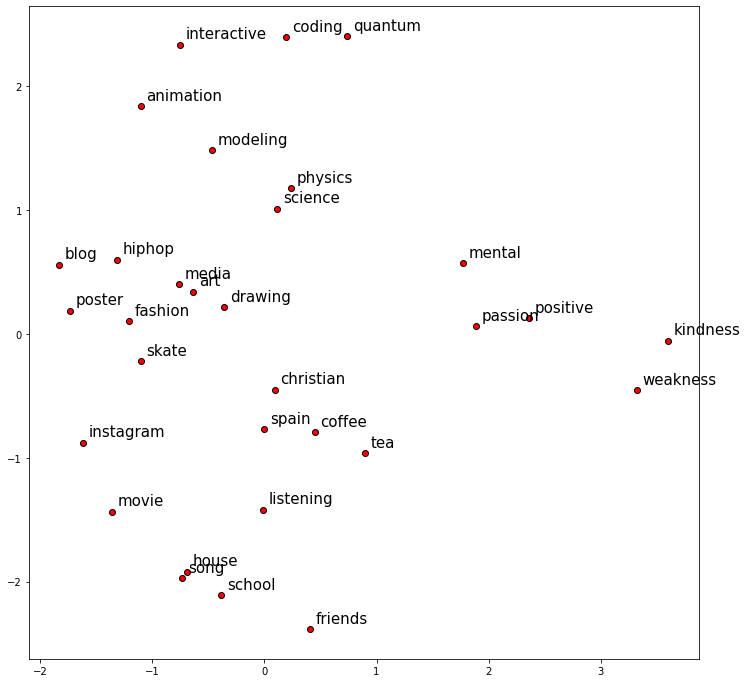

In [18]:
# Select word list of your own interests
word_list = ['quantum', 'science', 'school', 'coding', 'interactive', 'poster', 'movie', 'skate', 'kindness', 'weakness', 'mental', 'christian', 'fashion', 'friends', 'hiphop', 'song', 'listening', 'positive', 'passion', 'physics', 'art',
             'modeling', 'animation', 'spain', 'drawing', 'coffee', 'tea', 'media', 'instagram', 'blog', 'house' 

]

display_pca_scatterplot(model, word_list)

## Problem 5. Compare different models (10 pts)
- Word2Vec models can be trained on different corpus (text) or with different embedding size
- The goal of this problem is to compare two different models with *different embedding size*
- Select two models with different embedding size but the same training corpus
    - e.g.  ``'glove-wiki-gigaword-50'``, ``'glove-wiki-gigaword-300'``

- In your report, present at least **5** interesting examples that makes different result by model selection
    - You can compare some word analogy examples or similairites or visualization

In [5]:
# list the model name again if you want
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [7]:
# select your model code 
small_model_code = 'glove-wiki-gigaword-50'
large_model_code = 'glove-wiki-gigaword-300'

small_model = gensim.downloader.load(small_model_code)
large_model = gensim.downloader.load(large_model_code)

[==================================================] 100.0% 66.0/66.0MB downloaded
[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# repeat problem 1,2,4 of your choice to compare small_model and large_model

In [23]:
target_word = 'apple' # Enter your word string here
# check the word is in the vocabulary of the model
assert small_model.has_index_for(target_word), f"The selected word, {target_word}, is not included in the model's vocabulary"
small_model.most_similar(target_word)

[('blackberry', 0.7543067336082458),
 ('chips', 0.7438644170761108),
 ('iphone', 0.7429664134979248),
 ('microsoft', 0.7334205508232117),
 ('ipad', 0.7331036329269409),
 ('pc', 0.7217225432395935),
 ('ipod', 0.7199784517288208),
 ('intel', 0.7192243337631226),
 ('ibm', 0.7146540284156799),
 ('software', 0.7093585133552551)]

In [24]:
target_word = 'apple' # Enter your word string here
# check the word is in the vocabulary of the model
assert large_model.has_index_for(target_word), f"The selected word, {target_word}, is not included in the model's vocabulary"
large_model.most_similar(target_word)

[('iphone', 0.5987043380737305),
 ('macintosh', 0.5836331248283386),
 ('ipod', 0.5761123895645142),
 ('microsoft', 0.5663833022117615),
 ('ipad', 0.5628098249435425),
 ('intel', 0.5457562804222107),
 ('ibm', 0.5286195278167725),
 ('google', 0.5282472968101501),
 ('imac', 0.507252037525177),
 ('software', 0.4962984323501587)]

In [12]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(small_model, 'poverty', 'wealth', 'sickness')

[('fluids', 0.6438249349594116),
 ('magnetism', 0.6217834949493408),
 ('residual', 0.6044836044311523),
 ('thirst', 0.6007238030433655),
 ('appetite', 0.5919932126998901),
 ('immense', 0.5867217779159546),
 ('pleasures', 0.5829240679740906),
 ('blood', 0.5818973183631897),
 ('pleasure', 0.5654019713401794),
 ('hive', 0.5637728571891785)]


In [11]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(large_model, 'poverty', 'wealth', 'sickness')

[('wasting', 0.38760021328926086),
 ('accrued', 0.38343217968940735),
 ('accumulated', 0.36929944157600403),
 ('ill-gotten', 0.36765268445014954),
 ('riches', 0.3603493869304657),
 ('fortune', 0.3574392795562744),
 ('accumulating', 0.3513698875904083),
 ('immense', 0.3419641852378845),
 ('newfound', 0.34072938561439514),
 ('decompression', 0.33810797333717346)]


In [13]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(small_model, 'soccer', 'messi', 'basketball')

[('ronaldinho', 0.7167998552322388),
 ('lebron', 0.7034477591514587),
 ('mcgrady', 0.7031396627426147),
 ('olajuwon', 0.702713131904602),
 ("o'neal", 0.6980611681938171),
 ('rivaldo', 0.696628212928772),
 ('brees', 0.6937004327774048),
 ("eto'o", 0.6906342506408691),
 ('bourque', 0.6869744062423706),
 ('shaquille', 0.6836276650428772)]


In [14]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(large_model, 'soccer', 'messi', 'basketball')

[("eto'o", 0.5208575129508972),
 ('xavi', 0.5021194815635681),
 ('iniesta', 0.4962547719478607),
 ('ronaldinho', 0.4669080972671509),
 ('bojan', 0.4561964273452759),
 ('garnett', 0.44840869307518005),
 ('shaq', 0.44296619296073914),
 ('shaquille', 0.4425499141216278),
 ('lebron', 0.43662938475608826),
 ("o'neal", 0.43588876724243164)]


In [15]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(small_model, 'mother', 'home', 'teacher')

[('school', 0.7953029870986938),
 ('student', 0.7711709141731262),
 ('schools', 0.7541789412498474),
 ('students', 0.7480208277702332),
 ('college', 0.7465643286705017),
 ('campus', 0.7331162095069885),
 ('teachers', 0.7245280742645264),
 ('high', 0.7225134372711182),
 ('at', 0.717426598072052),
 ('graduate', 0.711702823638916)]


In [16]:
def analogy(model, x1, x2, y1):
  pp.pprint(model.most_similar([x2, y1], negative=[x1]))

# Try with your own word choice
analogy(large_model, 'mother', 'home', 'teacher')

[('teachers', 0.5522273182868958),
 ('school', 0.5246594548225403),
 ('classroom', 0.5122290849685669),
 ('students', 0.5081290006637573),
 ('student', 0.48576828837394714),
 ('education', 0.48130881786346436),
 ('schools', 0.46445053815841675),
 ('teaching', 0.46327850222587585),
 ('training', 0.4431963562965393),
 ('courses', 0.44211283326148987)]


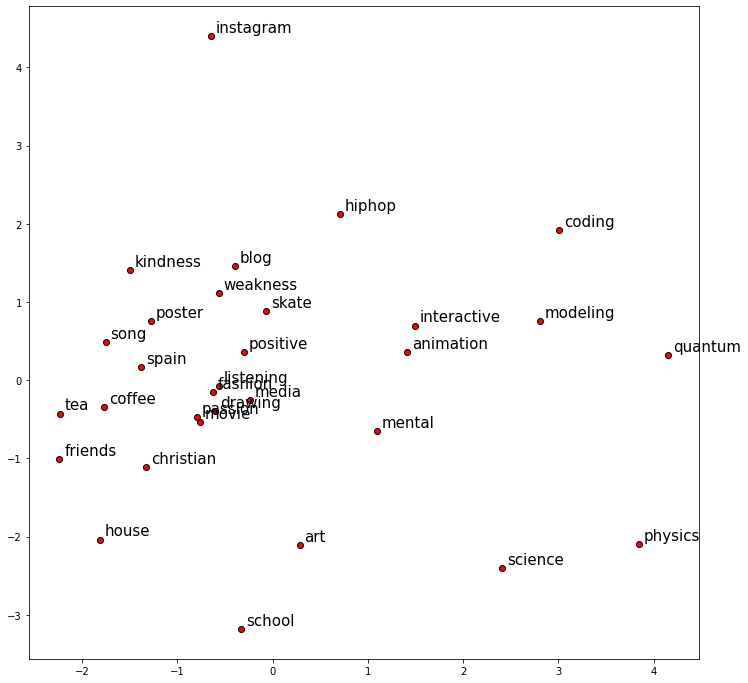

In [19]:
display_pca_scatterplot(small_model, word_list)

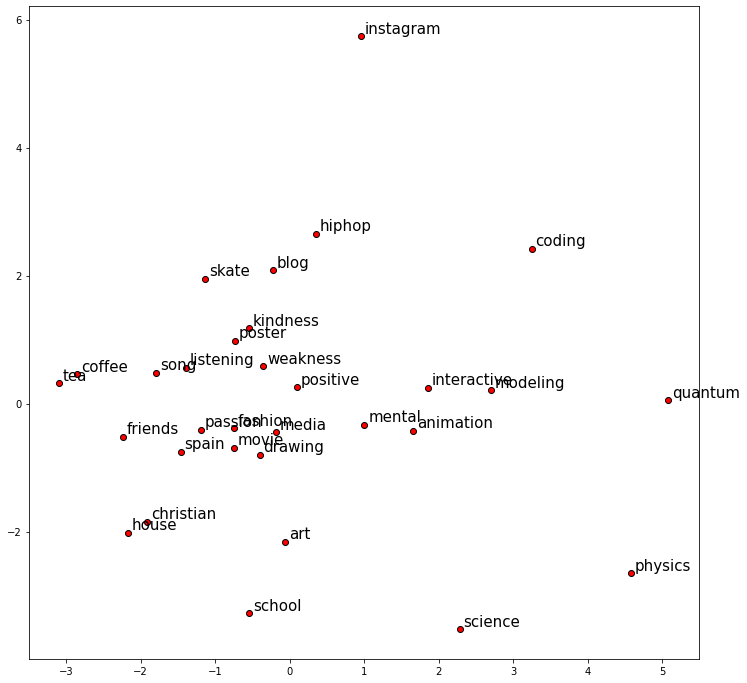

In [20]:
display_pca_scatterplot(large_model, word_list)